<a href="https://colab.research.google.com/github/Ocedy16/Machine-Learning-L2/blob/main/TD_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = data.data
y = data.target

X_train,X_test,y_train,y_test=train_test_split(X,y)

from sklearn.svm import LinearSVC
svm = LinearSVC(C=1).fit(X_train,y_train)
print('Score: ',svm.score(X_test,y_test))

Score:  0.9230769230769231


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warning

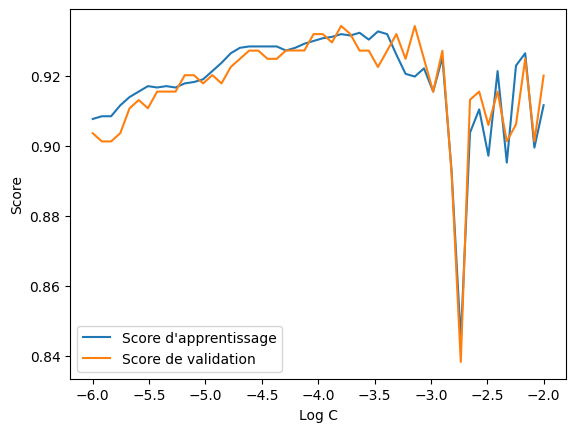

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
#svm = LinearSVC(C=1).fit(X_train,y_train)
scores = cross_val_score(svm, X_train, y_train, cv=7)
C_range=np.logspace(-6,-2,50)
train_scores, valid_scores = validation_curve(LinearSVC(),X_train,y_train,param_name="C",param_range=C_range,cv=7)

train_mean_score = np.mean(train_scores,axis=1)
valid_mean_score = np.mean(valid_scores,axis=1)

plt.plot(np.log10(C_range), train_mean_score, label='Score d\'apprentissage')
plt.plot(np.log10(C_range), valid_mean_score, label='Score de validation')
plt.xlabel("Log C")
plt.ylabel("Score")
plt.legend()
plt.show()

In [ ]:
C_best=C_range[np.argmax(valid_mean_score)]
svm=LinearSVC(C=C_best).fit(X_train,y_train)
print(svm.score(X_test,y_test))
y_test_predict=svm.predict(X_test)

0.916083916083916


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_test =confusion_matrix(y_test,y_test_predict)
print(confusion_matrix_test)
tp = confusion_matrix_test[0,0]
fp = confusion_matrix_test[1,0]
fn = confusion_matrix_test[0,1]
recall = tp/(tp+fn)
precision = tp/(tp+fp)
print('Recall :', recall)
print('Precision :', precision)

[[45  9]
 [ 3 86]]
Recall : 0.8333333333333334
Precision : 0.9375


In [ ]:
from sklearn.metrics import recall_score, precision_score
print('Recall :',recall_score(y_test,y_test_predict,pos_label=0))
print("Précision :", precision_score(y_test,y_test_predict,pos_label=0))

Recall : 0.8333333333333334
Précision : 0.9375


In [ ]:
def false_positive_rate (y_true,y_predict,pos_label):
  FP=confusion_matrix(y_test,y_test_predict)[1-pos_label][pos_label]
  TN=confusion_matrix(y_test,y_test_predict)[1-pos_label][1-pos_label]
  return FP/(FP+TN)

false_positive_rate(y_test,y_test_predict,pos_label=0)

0.033707865168539325

In [ ]:
#def modified_predictor(array_xi,tau):
 #   array=[]
  #  produit_scalaire=svm.decision_function(array_xi)
   # for i in produit_scalaire:
    #  if i> tau : array.append(1)
     # array.append(0)
    #return array
#modified_predictor(X_test,1)

def modified_predictor(X,tau):
    return (svm.decision_function(X) >= tau).astype('int')

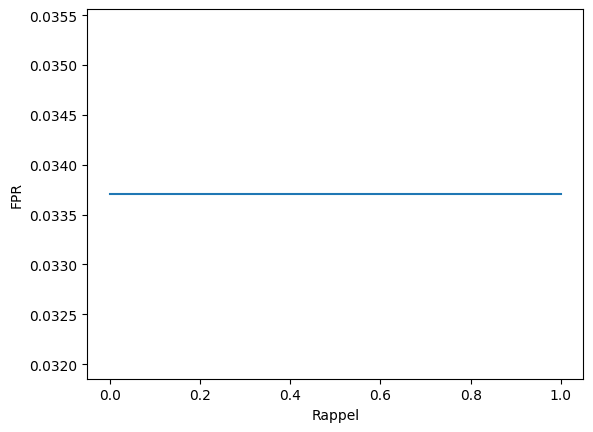

In [ ]:
#Une bonne famille de prédicteurs a une courbe au dessus de la diagonale et une mauvaise famille une courbe en dessous ou à peine au dessus
decision_function_train = svm.decision_function(X_train)
tau_range = np.linspace(np.min(decision_function_train),np.max(decision_function_train),100)
tau_range
FPR=[]
Rappel=[]
for tau in tau_range:
  predic=modified_predictor(X_train,tau)
  Rappel.append(recall_score(y_train,predic,pos_label=0))
  FPR.append(false_positive_rate(y_test,predic,0))
plt.plot(Rappel,FPR)
plt.xlabel("Rappel")
plt.ylabel("FPR")
plt.show()

In [ ]:
recalls_array = np.array(Rappel)
fprs_array = np.array(FPR)

good_enough_recalls_index = (recalls_array >= .95)
tau_best = (tau_range[good_enough_recalls_index])[np.argmin(fprs_array[good_enough_recalls_index])]

y_test_predict = modified_predictor(X_test,tau_best)

from sklearn.metrics import accuracy_score
print('Accuracy score: ', accuracy_score(y_test, y_test_predict))
print('Recall: ', recall_score(y_test, y_test_predict,pos_label=0))
print('Precision: ', precision_score(y_test, y_test_predict,pos_label=0))
print('False positive rate: ', false_positive_rate(y_test, y_test_predict,pos_label=0))

Accuracy score:  0.8041958041958042
Recall:  0.9629629629629629
Precision:  0.6666666666666666
False positive rate:  0.29213483146067415
